# 5장. 기술통계분석
#### 5.1 평균, 분산, 표준편차
$1.$ 평균

1) 산술 평균: 자료들의 전체 합을 자료의 개수(또는 자유도)로 나눈 값
\begin{align}
\mathbb{E}(X) = \dfrac{\sum_{i=1}^{n}X_{i}}{n} = \dfrac{X_{1}+X_{2}+\cdots+X_{n}}{n}
\end{align}

2)기하 평균: 자료들의 곱을 자료 수만큼 제곱근한 값, 주로 곱셈으로 계산하는 값들의 평균을 계산할 때 사용
\begin{align}
\mathbb{E}(X) = (\prod_{i=1}^{n}X_{i})^{1/n} = (X_{1}\cdot X_{2}\cdots X_{n})^{1/n}
\end{align}

3)조화 평균:역수들의 산술평균을 다시 역수를 취한 값, 주로 데이터의 평균적인 변화율이나 업무능률의 평균을 구할 때 사용
\begin{align}
\mathbb{E}(X) = \dfrac{1}{\dfrac{\sum_{i=1}^{n}\frac{1}{X_{i}}}{n}} = \dfrac{1}{\dfrac{(\frac{1}{X_{1}} + \frac{1}{X_{2}} + \cdots + \frac{1}{X_{n}})}{n}}
\end{align}

$2. $ 분산, 표준편차

1) 분산: 자료의 퍼짐을 알 수 있는 지표, 산술평균이 갖지 못하는 자료의 산포도를 제공함.
\begin{align}
Var(X) = \frac{1}{n}\sum_{i=1}^{n}(X_{i} - \mathbb{E}(X))^{2}
\end{align}

2) 표준편차
\begin{align}
\sigma(X) = \sqrt{Var(X)}
\end{align}


예시) A쇼핑에서 증정된 할인권 사용빈도를 분석하고 싶다. 성별을 기준으로 평균과 표준편차를 확인하면 고객마다 할인권 지급 수를 조절할 수 있고, 성별 따라 분표가 다르다면 새로운 고객별 쿠폰 지급 전략을 세울 수 있다.

In [9]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
file_dir = '/content/drive/MyDrive/pythondata/데이터'
df = pd.read_csv(file_dir + '/Ashopping.csv', encoding = 'CP949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   고객ID              1000 non-null   int64  
 1   이탈여부              1000 non-null   int64  
 2   총_매출액             1000 non-null   int64  
 3   방문빈도              1000 non-null   int64  
 4   1회_평균매출액          1000 non-null   int64  
 5   할인권_사용 횟수         1000 non-null   int64  
 6   총_할인_금액           1000 non-null   int64  
 7   고객등급              1000 non-null   int64  
 8   구매유형              1000 non-null   int64  
 9   클레임접수여부           1000 non-null   int64  
 10  구매_카테고리_수         1000 non-null   int64  
 11  거주지역              1000 non-null   int64  
 12  성별                1000 non-null   int64  
 13  고객_나이대            1000 non-null   int64  
 14  거래기간              1000 non-null   int64  
 15  할인민감여부            1000 non-null   int64  
 16  멤버쉽_프로그램_가입전_만족도  1000 non-null   int64  
 

In [11]:
df_1 = df[['할인권_사용 횟수','성별']]
df_1.groupby('성별').agg(['mean','var','std'])

할인권_사용 횟수                     
         mean        var       std
성별                                
0   15.986577  69.053873  8.309866
1   16.034078  69.750602  8.351683

분석결과 성별에 따라 평균이나 분산의 값이 크게 차이가 나지 않아, 성별에 따른 전략은 모색하지 않아도 될 것같다.

#### 5.2 왜도와 첨도

분산과 표준편차는 산포도(자료의 퍼짐)를 파악할 수 있으나, 구체적인 특성(치우침, 뾰족함)은 파악할 수 없다. 왜도와 첨도를 이용하면 산포도의 외형적인 특성을 파악할 수 있다.

1) 왜도(Skewness): 자료들의 분포가 왼쪽/오른쪽으로 치우쳐 있는 정도를 나타내는 지표.
\begin{align}
    S(X) = \dfrac{1}{n}\sum_{i=1}^{n}\dfrac{(X_{i} - \mathbb{E}(X))^{3}}{\sigma(X)^{3}} \qquad where \quad \sigma(X):\text{standard deviation}
\end{align}
이때, $S(X)$가 0이면 대칭분포, 0보다 크면 오른쪽으로 치우친 분표, 0보다 작으면 왼쪽으로 치우친 분포다.

2)첨도(Kurtosis): 분표의 뾰족한 정도를 나타내는 값으로서 자료들이 얼마나 평균이 집중되어 있는지를 나타내는 지표. 3을 빼는 이유는 $X \sim N(0,1)$의 확률변수의 $\mathbb{E}(X^{4}) = 3$이기 때문이다.
\begin{align}
    K(X) = \dfrac{1}{n}\sum_{i=1}^{n}\dfrac{(X_{i} - \mathbb{E}(X))^{4}}{\sigma(X)^{4}}-3 \qquad where \quad \sigma(X):\text{standard deviation}
\end{align}
이때, $K(X)$가 0이면 정규분표, 0보다 크면 정규분포보다 뾰족한 분표를 보이고, 0보다 작으면 정규분포보다 완만한 분표를 보인다.

예시) A쇼핑몰의 서비스만족도에 대한 왜도와 첨도를 분석하라.

In [12]:
#코랩에서 한글 사용하려면 하단 코드 실행 후, 런타임 다시 시작
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

mean    5.544000
skew   -0.970661
kurt    1.147825
Name: 서비스_만족도, dtype: float64


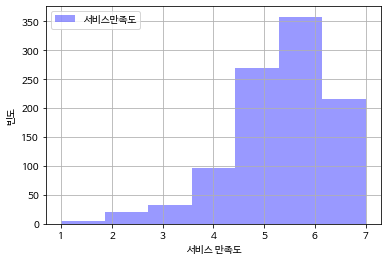

In [13]:
print(df.서비스_만족도.apply(['mean','skew','kurt']))

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import matplotlib

#한글 깨짐 방지
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.hist(df['서비스_만족도'], alpha = 0.4, bins = 7, rwidth = 1, color = 'blue', label = '서비스만족도')
x = df['서비스_만족도'].drop_duplicates().sort_values()
y = df['서비스_만족도'].value_counts().sort_values()
#plt.plot(x,y)
plt.legend()
plt.grid()
plt.xlabel('서비스 만족도')
plt.ylabel('빈도')
plt.show()

왜도가 -0.971(<0)이고 첨도는 1.148(>0)이다. 왜도가 음수이므로 그래프가 좌측으로 쏠려있고, 첨도가 0을 넘으므로 정규분포보다 뾰족한 것(평균보다 다소 높게 평가하는 고객이 많음)을 확인 할 수 있다.

#### 5.3 기타 기술통계량

1) 중앙값(median): 자료를 크기 순서대로 놓았을 때 가장 중앙에 위치한 값 (대표성을 나타내는 보조 지표)
\begin{align}
md =     \begin{cases}
        X_{(\frac{n+1}{2})} & \text{if } \text{n is odd number}\\
        (X_{(\frac{n}{2})} + X_{(\frac{n+2}{2})})/2 & \text{if } \text{n is even number} 
        \end{cases}
\end{align}

2) 최빈값(mode): 자료의 집단에서 가장 많이 관측되는 수치 (중앙값과 마찬가지로 자료의 대표성을 나타내는 보조 지표)

3) 사분위수(quartile): 자료들을 크기 순서로 놓았을 때 누적 백분율을 4등분한 각 점의 위치를 의미 (주로 상자그림(box plot)을 그릴 때 자주 이용)

* 1사분위수: 누적 25%

* 2사분위수: 누적 50% = 중앙값

* 3사분위수: 누적 75%

* 4사분위수: 누적 100%

사분위수는 분산, 표준편창와 같이 자료의 전반적인 분포의 특성을 설명해줄 뿐만 아니라, 왜도와 첨도와 같이 특정 영역에서의 집중성이나 편중성 또한 묘사해주기 때문에 유용한 통계지표로 활용됨.

예시) A쇼핑몰에서 정기적으로 고객들에게 할인권을 뿌린다. 매달 고객들에서 1~2장의 할인권을 발송하는데, 평균 사용횟수가 연 16회 정도라 적절하다고 생각했다. 하지만 할인쿠폰의 사용빈도의 평균으로만 해석하기에는 신뢰성이 떨어져, 중앙값, 최빈값과 같은 기술통계량으로 의사결정의 타당성을 검증해보라. 

In [14]:
import numpy as np

# percentile 함수는 데이터 값의 분위수를 불러온다.
print("1분위수: {:}".format(np.percentile(df['할인권_사용 횟수'],25)))
print("2분위수: {:}".format(np.percentile(df['할인권_사용 횟수'],50)))
print("3분위수: {:}".format(np.percentile(df['할인권_사용 횟수'],75)))
print("4분위수: {:}".format(np.percentile(df['할인권_사용 횟수'],100)))
# value_counts로 할인권 사용 횟수의 빈도를 조사하고, idxmax로 최대값일 때의 값을 불러온다. 
print("최빈값: {:}".format(df['할인권_사용 횟수'].value_counts().idxmax()))

1분위수: 9.0
2분위수: 17.0
3분위수: 23.0
4분위수: 30.0
최빈값: 22


In [15]:
print(df['할인권_사용 횟수'].describe())

count    1000.000000
mean       16.027000
std         8.341334
min         1.000000
25%         9.000000
50%        17.000000
75%        23.000000
max        30.000000
Name: 할인권_사용 횟수, dtype: float64


분석결과에서 볼 수 있듯이, 할인권 사용 횟수의 중앙값은 17이므로 중간 수준의 연간 회원들은  할인권을 17회 사용하였으며 연간 22회(최빈값) 사용한 회원이 가장 많은 것으로 볼 수 있다. 결론적으로 상위 고객일수록 연간 할인권 사용 횟수는 많이 높아지는 것을 볼 수 있다.